In [145]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.style.use('ggplot')


აღმოღნდა პრობლემური CSV ფაილის წაკითხვა იმიტო, რომ educationshi ზოგიერთს უწერია 2n cycle და pd.read_csv(delim_whitespace=True)
თი აღიქვავს მოცემულს 2 სხვადასხვა column-ად ამიტომ ვცვლით ფაილში 2n cycle-ს 2n_cycle-ად

In [146]:
f_content=''
with open("../Data/Data Science Task customer_analysis.csv",'r') as read_f:
    for row in read_f:
        if row.split()[2]=='2n':
            row=row.replace('Cycle','')
            row=row.replace('2n','2n_Cycle')
            f_content+=row
            continue
        f_content+=row
    
with open("../Data/Data Science Task customer_analysis_New.csv",'w') as write_f:
    write_f.write(f_content)





In [147]:
df=pd.read_csv('../Data/Data Science Task customer_analysis_New.csv',delim_whitespace=True)
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1.0
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0.0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0.0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0.0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0.0


In [148]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2216.000000
mean,5592.159821,1968.805804,51687.466518,0.443304,50.600446,302.051339,27.816964,165.497768,37.558036,27.266964,...,5.262054,0.074107,0.073661,0.073214,0.063393,0.013393,0.041518,3.085714,10.882589,0.150271
std,3246.662198,11.984069,25609.328307,0.537474,40.815402,336.807537,54.287973,223.581366,54.784887,41.703168,...,2.473727,0.262004,0.261276,0.260546,0.243723,0.114976,0.322686,0.823814,1.128644,0.357417
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,2828.250000,1959.000000,34722.000000,0.000000,24.000000,23.000000,2.000000,15.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,5458.500000,1970.000000,51075.000000,0.000000,49.000000,172.000000,8.000000,66.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,74.000000,502.250000,33.000000,230.000000,50.000000,34.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,861.000000,1493.000000,1607.000000,1725.000000,263.000000,362.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,11.000000,1.000000


<AxesSubplot:xlabel='Year_Birth', ylabel='Income'>

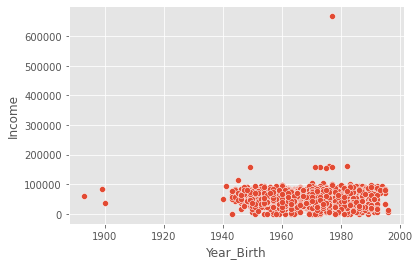

In [149]:
sns.scatterplot(data=df,x='Year_Birth',y="Income")
#gvaqvs outlierebi vashorebt mat

In [150]:
#outlierebis moshorebis funqcia
from scipy import stats

def remove_outliers(data, feature):
    z_score = stats.zscore(data[feature])
    abs_z_score = np.abs(z_score)
    filtered_data = data[(abs_z_score < 3)]
    return filtered_data



აღმოჩნდა, რომ ფაილში არეულია 24 ხაზი ვაშორებ მათ რადგან თითოეული ზუსტად როგორ არის არეული გაუგებარია და მათი
არასწორად დალაგება უარეს შედეგს მოგვცემს ვიდრე მოშორება ყველა შემთხვევაში Nan გვაქვს ბოლო featureshi და გადაადგილება გვხვდება.

In [151]:
df[df['Response'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,1,0,15-11-2013,11,5,5,...,0,0,0,0,0,0,3,11,0,NaN
27,5255,1986,Graduation,Single,1,0,20-02-2013,19,5,1,...,0,0,0,0,0,0,3,11,0,NaN
43,7281,1959,PhD,Single,0,0,05-11-2013,80,81,11,...,0,0,0,0,0,0,3,11,0,NaN
48,7244,1951,Graduation,Single,2,1,01-01-2014,96,48,5,...,0,0,0,0,0,0,3,11,0,NaN
58,8557,1982,Graduation,Single,1,0,17-06-2013,57,11,3,...,0,0,0,0,0,0,3,11,0,NaN
71,10629,1973,2n_Cycle,Married,1,0,14-09-2012,25,25,3,...,0,0,0,0,0,0,3,11,0,NaN
90,8996,1957,PhD,Married,2,1,19-11-2012,4,230,42,...,0,0,0,0,0,0,3,11,0,NaN
91,9235,1957,Graduation,Single,1,1,27-05-2014,45,7,0,...,0,0,0,0,0,0,3,11,0,NaN
92,5798,1973,Master,Together,0,0,23-11-2013,87,445,37,...,0,0,0,0,0,0,3,11,0,NaN
128,8268,1961,PhD,Married,0,1,11-07-2013,23,352,0,...,0,0,0,0,0,0,3,11,0,NaN


In [152]:
df.dropna(inplace=True)
df.describe()

,ID,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [153]:

print(type(df['Teenhome'].iloc[0]))
df['Teenhome']=pd.to_numeric(df['Teenhome'])
print(type(df['Teenhome'].iloc[0]))
df['Teenhome'].head()


<class 'str'>
<class 'numpy.int64'>


0    0
1    1
2    0
3    0
4    0
Name: Teenhome, dtype: int64

In [154]:
df.count()[0]

2216

ვაშორებთ outlier-ებს, რადგან დაკლასტერების მეთოდები მგრძნობიარე არიან outlier-ებისსადმი იმიტომ , რომ კლასტერის
ცენტრის მიახლოაბას ცდილობენ ყველა წერტილთან და outlier-ები ცენტრს ზედმეტად ხრიან მათკენ.

In [155]:

#columnebi sadac shesadzloa shegvxvdes outlieri
columns=['Income','Kidhome','Teenhome','Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',]

filt_df=remove_outliers(df,'Year_Birth')

for i in columns:

       numd=filt_df.count()[0]

       filt_df=remove_outliers(filt_df,i)
       
       print(i+' = '+str(numd)+' - ' + str(numd-filt_df.count()[0])+'='+str(filt_df.count()[0]))

#aseve vashorebt ID-s 
filt_df.drop('ID',inplace=True, axis=1)

#df.describe() 

Income = 2213 - 8=2205
Kidhome = 2205 - 0=2205
Teenhome = 2205 - 0=2205
Recency = 2205 - 0=2205
MntWines = 2205 - 15=2190
MntFruits = 2190 - 64=2126
MntMeatProducts = 2126 - 49=2077
MntFishProducts = 2077 - 51=2026
MntSweetProducts = 2026 - 64=1962
MntGoldProds = 1962 - 50=1912
NumDealsPurchases = 1912 - 27=1885
NumWebPurchases = 1885 - 0=1885
NumCatalogPurchases = 1885 - 42=1843
NumStorePurchases = 1843 - 0=1843
NumWebVisitsMonth = 1843 - 5=1838


ვიწყებთ დატას პრეპროცესირების გამზადებას

In [156]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA


# varchevt ricxvit columnebs romlebzec shesadzlebelia skalarul sidideebad gadaketeba
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
             'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
              'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
               'NumStorePurchases', 'NumWebVisitsMonth']

# ganatlebis sveti sachiroebs ordinalencoders
ordinal_cats = [['Basic', '2n_Cycle', 'Graduation', 'Master', 'PhD']]
ordinal_enc = OrdinalEncoder(categories=ordinal_cats)

# ojaxurimdgomareobis sveti ki onehot encoders
onehot_enc = Pipeline(steps=[('onehot', OneHotEncoder())])

num_pipe = Pipeline(steps=[('scaler', StandardScaler()),('pca', PCA(n_components=2))])

ordinal_pipe = Pipeline(steps=[('ordinal', ordinal_enc)])


preprocessor = ColumnTransformer(transformers=[('onehot', onehot_enc, ['Marital_Status']),
                                                ('standard', num_pipe, num_cols),
                                                ('ordinal', ordinal_pipe, ['Education'])])

ვარჩევთ საუკეთესო K-ს მნიშვნელობას

In [157]:
from sklearn.cluster import KMeans

<AxesSubplot:>

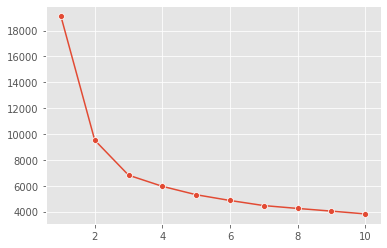

In [158]:
k_mnishvn = range(1, 11)
inertia = []

for k in k_mnishvn:
    pipeline_kmeans = Pipeline(steps=[('preprocessor', preprocessor),
                        ('kmeans', KMeans(n_clusters=k, random_state=42))])
    pipeline_kmeans.fit(filt_df)
    kmeans_estimator=pipeline_kmeans.named_steps['kmeans']
    inertia.append(kmeans_estimator.inertia_)

# elbow ploti romelshic vxedavt, rom sauketeso ks mnishvneloba aris 3
sns.lineplot(x=k_mnishvn, y=inertia , markers=True , marker='o' )

Kmeans-ის შედეგოს ვიზუალიზაციას ვახდენთ უკვე შერჩეული საუკეთესო k-ს მნიშვნელობით

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

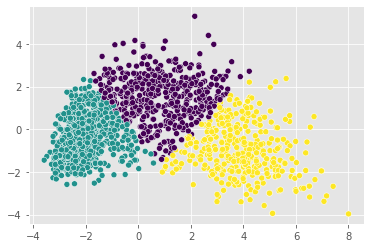

In [160]:
from sklearn.decomposition import PCA


pipeline_kmeans=Pipeline(steps=[('preprocessor', preprocessor),
                        ('kmeans', KMeans(n_clusters=3, random_state=42))])


pipeline_kmeans.fit(filt_df)

# PCA-ის დახმარებით დატა გადაგვყავს 2d ში რათა შევძლოთ მისი დაგეგმარება
pca = PCA(n_components=2)
X_2d = pca.fit_transform(preprocessor.fit_transform(filt_df))

# ვიღებთ კლასტერების ნიშნულებს
labels = pipeline_kmeans.predict(filt_df)

# სხვადასხვაფრად ვაგეგმარებტ scatterplot-ზე
sns.scatterplot(X_2d[:, 0], X_2d[:, 1], c=labels)

In [161]:
from sklearn.metrics import silhouette_score
kmeans=pipeline_kmeans.named_steps['kmeans']
silhouette_score(preprocessor.fit_transform(filt_df),kmeans.labels_)

0.37105340114019636